In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('final_with_main_features.csv',sep=',')

In [3]:
df=df.drop(df.columns[0], axis=1)

In [4]:
train_percentage = 13/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [5]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [6]:
x_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [7]:
x_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [8]:
x_test.shape

(4320, 8)

In [9]:
x_train.shape

(6240, 8)

In [10]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(1248,5,8)
x_shaped_test  = np.array(x_test).reshape(864,5,8)

In [11]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_shaped_train  = []
for i in range(0, len(y_train), 5):
  y_shaped_train.append([y_train[i]])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 5):
  y_shaped_test.append([y_test[i]])
print(len(y_shaped_test))

1248
864


In [12]:
x_shaped_train.shape

(1248, 5, 8)

In [13]:
x_shaped_test.shape

(864, 5, 8)

In [14]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(1248, 1)

In [15]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(864, 1)

In [16]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(5, 4,),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='tanh')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))#Output Layer
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(x_shaped_train, y_shaped_train, validation_data = (x_shaped_test,y_shaped_test), epochs=50, batch_size=  10)
model.predict_classes(x_shaped_test)

Using TensorFlow backend.


Train on 1248 samples, validate on 864 samples
Epoch 1/50
1248/1248 [==============================] - 29s 23ms/step - loss: 2.5272 - accuracy: 0.4511 - val_loss: 0.6915 - val_accuracy: 0.4954
Epoch 2/50
1248/1248 [==============================] - 27s 22ms/step - loss: 1.7449 - accuracy: 0.4888 - val_loss: 0.7407 - val_accuracy: 0.5000
Epoch 3/50
1248/1248 [==============================] - 22s 18ms/step - loss: 1.5034 - accuracy: 0.4792 - val_loss: 0.6993 - val_accuracy: 0.4954
Epoch 4/50
1248/1248 [==============================] - 24s 19ms/step - loss: 1.5304 - accuracy: 0.4992 - val_loss: 0.6890 - val_accuracy: 0.5694
Epoch 5/50
1248/1248 [==============================] - 23s 18ms/step - loss: 1.3568 - accuracy: 0.4928 - val_loss: 0.6945 - val_accuracy: 0.4919
Epoch 6/50
1248/1248 [==============================] - 26s 21ms/step - loss: 1.3688 - accuracy: 0.4840 - val_loss: 0.7544 - val_accuracy: 0.5000
Epoch 7/50
1248/1248 [==============================] - 30s 24ms/step - loss:

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict_classes(x_shaped_test)
y_score_10 = model.predict_proba(x_shaped_test)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn))
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.6574074074074074, 0.6954732510288066, 0.6469612697187929]
[[230 202]
 [ 94 338]]


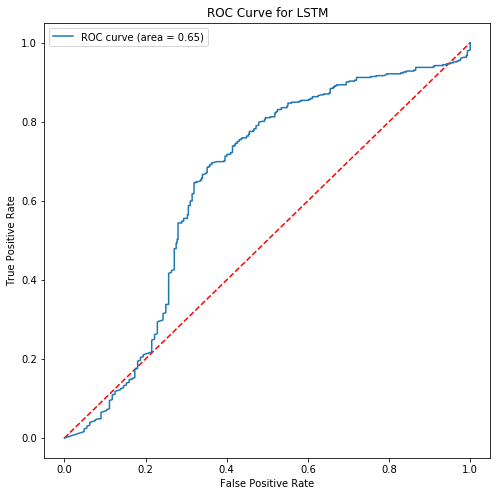

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Text(0.5, 1.0, 'Calibration Curve for LSTM')

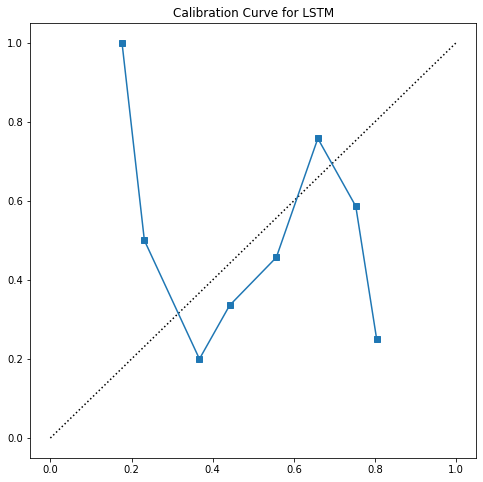

In [19]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')
plt.title('Calibration Curve for LSTM')